# Overview of the `poligrain` package

In [1]:
import sys

sys.path.append('poligrain/src')

In [2]:
import matplotlib.pyplot as plt
import poligrain as plg

## Get and prepare example data

We download a subset of he OpenMRG dataset which is described in Andersson et al. (2022) here https://doi.org/10.5194/essd-14-5411-2022 and which is available for download at https://doi.org/10.5281/zenodo.6673750

The subset that we use was already processed, in particular the CML data, but with a very basic processing.

In addition, here, we will project the lon-lat coordinates in the fitting UTM zone, so that we can do correct distance calculations.

In [15]:
(
    ds_rad,
    ds_cmls,
    ds_gauges_municp,
    ds_gauge_smhi,
) = plg.example_data.load_openmrg_5min_2h(data_dir="example_data")

# we still need to rename variables here, until we update the example dataset...
ds_rad = ds_rad.rename({"longitudes": "lon", "latitudes": "lat"})
ds_rad = ds_rad.set_coords(["lon", "lat"])

ds_gauges_municp = ds_gauges_municp.rename({'station_id': 'id'})

File already exists at example_data/openmrg_cml_5min_2h.nc
Not downloading!
File already exists at example_data/openmrg_rad_5min_2h.nc
Not downloading!
File already exists at example_data/openmrg_municp_gauge_5min_2h.nc
Not downloading!
File already exists at example_data/openmrg_smhi_gauge_5min_2h.nc
Not downloading!


### Project coordinates to UTM

In [16]:
# Project coordinates for rain gauges
ds_gauges_municp.coords["x"], ds_gauges_municp.coords["y"] = plg.spatial.project_point_coordinates(
    ds_gauges_municp.lon, ds_gauges_municp.lat, "EPSG:25832"
)
ds_gauge_smhi.coords["x"], ds_gauge_smhi.coords["y"] = plg.spatial.project_point_coordinates(
    ds_gauge_smhi.lon, ds_gauge_smhi.lat, "EPSG:25832"
)

# Project coordinates for CMLs
(
    ds_cmls.coords["site_0_x"],
    ds_cmls.coords["site_0_y"],
) = plg.spatial.project_point_coordinates(
    ds_cmls.site_0_lon, ds_cmls.site_0_lat, "EPSG:25832"
)
(
    ds_cmls.coords["site_1_x"],
    ds_cmls.coords["site_1_y"],
) = plg.spatial.project_point_coordinates(
    ds_cmls.site_1_lon, ds_cmls.site_1_lat, "EPSG:25832"
)

# TODO: Reproject radar data

## Intro to data model

In OPENSENSE we agreed on a specific structure and naming convention for storing data in NetCDF, which translates to the respective `xarray.Dataset` objects.

### CML data

In [5]:
ds_cmls

<xarray.Dataset> Size: 122kB
Dimensions:       (cml_id: 359, time: 31)
Coordinates: (12/15)
    sublink_id    <U9 36B ...
  * cml_id        (cml_id) int64 3kB 10001 10002 10003 ... 10362 10363 10364
    site_0_lat    (cml_id) float64 3kB 57.7 57.73 57.69 ... 57.65 57.66 57.71
    site_0_lon    (cml_id) float64 3kB 12.0 11.98 11.97 ... 12.12 12.03 12.01
    site_1_lat    (cml_id) float64 3kB 57.7 57.72 57.69 ... 57.66 57.63 57.71
    site_1_lon    (cml_id) float64 3kB 11.99 11.97 11.98 ... 12.14 11.97 11.98
    ...            ...
    quantile      float64 8B ...
  * time          (time) datetime64[ns] 248B 2015-07-25T12:30:00 ... 2015-07-...
    site_0_x      (cml_id) float64 3kB 6.785e+05 6.776e+05 ... 6.792e+05
    site_0_y      (cml_id) float64 3kB 6.4e+06 6.402e+06 ... 6.394e+06 6.4e+06
    site_1_x      (cml_id) float64 3kB 6.783e+05 6.77e+05 ... 6.778e+05
    site_1_y      (cml_id) float64 3kB 6.399e+06 6.402e+06 ... 6.401e+06
Data variables:
    R             (time, cml_id) float64 89kB ...
Attributes: (12/14)
    title:                 Transformed and resampled OpenMRG-CML
    version:               1.1
    source:                Swedish Meteorological and Hydrological Institute ...
    contact:               hydro.fou@smhi.se, jafet.andersson@smhi.se, erlend...
    license:               https://creativecommons.org/licenses/by-sa/4.0
    doi:                   https://doi.org/10.5281/zenodo.6673750
    ...                    ...
    institution:           NA
    date:                  NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA

### Gauge data

In [11]:
ds_gauges_municp

<xarray.Dataset> Size: 4kB
Dimensions:          (time: 31, id: 10)
Coordinates:
  * id               (id) int64 80B 0 1 2 3 4 5 6 7 8 9
    lon              (id) float64 80B ...
    lat              (id) float64 80B ...
    location         (id) <U16 640B ...
    type             (id) <U14 560B ...
    quantization     (id) float64 80B ...
  * time             (time) datetime64[ns] 248B 2015-07-25T12:30:00 ... 2015-...
Data variables:
    rainfall_amount  (time, id) float64 2kB ...

###  Radar data (on cartesian grid)

In [178]:
ds_rad

<xarray.Dataset> Size: 456kB
Dimensions:          (time: 31, x: 37, y: 48)
Coordinates:
  * time             (time) datetime64[ns] 248B 2015-07-25T12:30:00 ... 2015-...
  * x                (x) float64 296B -1.542e+05 -1.522e+05 ... -8.22e+04
  * y                (y) float64 384B -3.413e+06 -3.415e+06 ... -3.507e+06
    lat              (y, x) float32 7kB 57.21 57.21 57.21 ... 58.06 58.06 58.06
    lon              (y, x) float32 7kB 11.41 11.45 11.48 ... 12.59 12.62 12.66
Data variables:
    crs              int32 4B ...
    rainfall_amount  (time, y, x) float64 440kB 0.01078 0.0003611 ... 0.05403
Attributes:
    source:       Swedish Meteorological and Hydrological Institute (SMHI), H...
    contact:      hydro.fou@smhi.se, remco.vandebeek@smhi.se
    title:        OpenMRG-Radar
    license:      https://creativecommons.org/licenses/by-sa/4.0
    version:      1.1
    doi:          https://doi.org/10.5281/zenodo.6673750
    proj_string:  +proj=stere +lat_ts=60 +ellps=bessel +lon_0=14 +lat_0=90
    comment:      Created by Remco van de Beek, Victor Näslund and Johan Thur...

## Plot data on a map

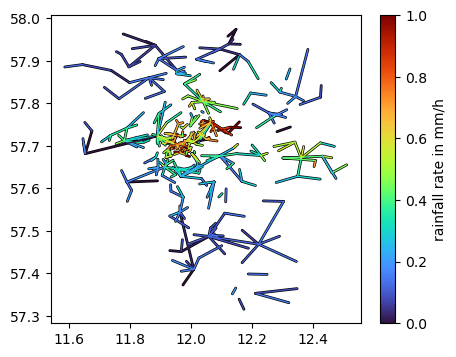

In [12]:
da_R = ds_cmls.R.isel(time=11)

fig, ax = plt.subplots(figsize=(5, 4))
lines = da_R.plg.plot_cmls(pad_width=1, vmin=0, vmax=1, ax=ax, use_lon_lat=True)
plt.colorbar(lines, label="rainfall rate in mm/h");

<Axes: xlabel='longitude [degrees_east]', ylabel='lat'>

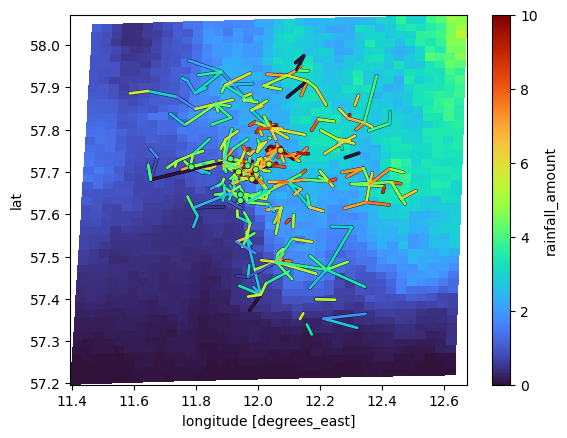

In [13]:
plg.plot_map.plot_plg(
    da_grid=ds_rad.rainfall_amount.sum(dim="time"),
    da_gauges=ds_gauges_municp.rainfall_amount.sum(dim="time"),
    use_lon_lat=True,
    da_cmls=ds_cmls.R.sum(dim="time"),
    vmin=0,
    vmax=10,
)

## Find gauges close to CMLs and compare data

In [116]:
max_distance = 2000  # in meters due to the projection EPSG:25832
closest_neigbors = plg.spatial.get_closest_points_to_line(
    ds_cmls, ds_gauges_municp, max_distance=max_distance, n_closest=10
)

In [117]:
closest_neigbors

<xarray.Dataset> Size: 60kB
Dimensions:      (cml_id: 359, n_closest: 10)
Coordinates:
  * cml_id       (cml_id) int64 3kB 10001 10002 10003 ... 10362 10363 10364
Dimensions without coordinates: n_closest
Data variables:
    distance     (cml_id, n_closest) float64 29kB 287.0 1.739e+03 ... inf inf
    neighbor_id  (cml_id, n_closest) object 29kB 7 4 None ... None None None

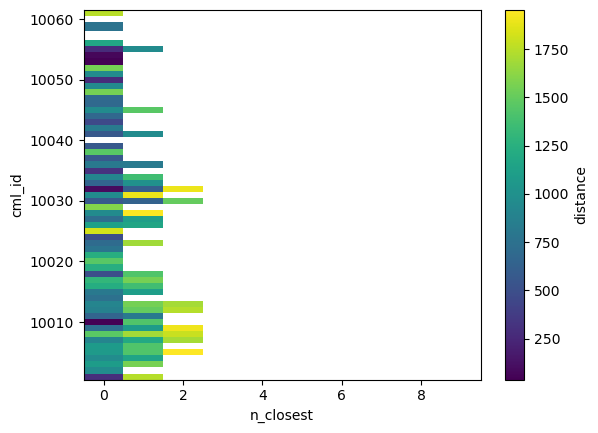

In [123]:
closest_neigbors.isel(cml_id=slice(0, 60)).distance.plot();

<Axes: >

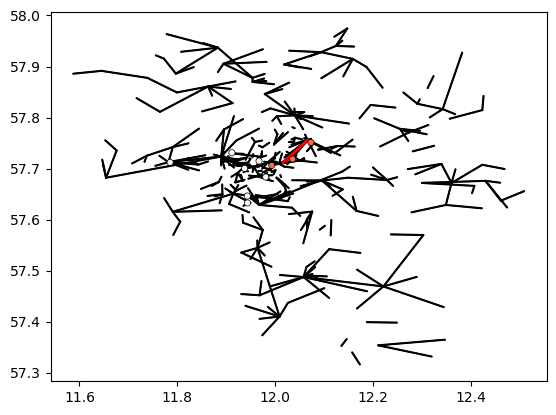

In [150]:
# plot CMLs and gauges on map and highlight those that are closer than 5000m
cml_id = 10030

# hacky way to get bool array with closest gauges set to True
da_gauges_close = (ds_gauges_municp.id == closest_neigbors.neighbor_id.sel(cml_id=cml_id)).max(dim='n_closest')

fig, ax = plt.subplots()
plg.plot_map.plot_lines(ds_cmls, line_color='k', ax=ax)
plg.plot_map.plot_lines(ds_cmls.sel(cml_id=cml_id), line_color='r', line_width=2, ax=ax)
# hacky way to plot the gauges highligting the close ones
plg.plot_map.plot_plg(da_gauges=da_gauges_close, ax=ax, vmin=0, vmax=2, cmap='Reds')


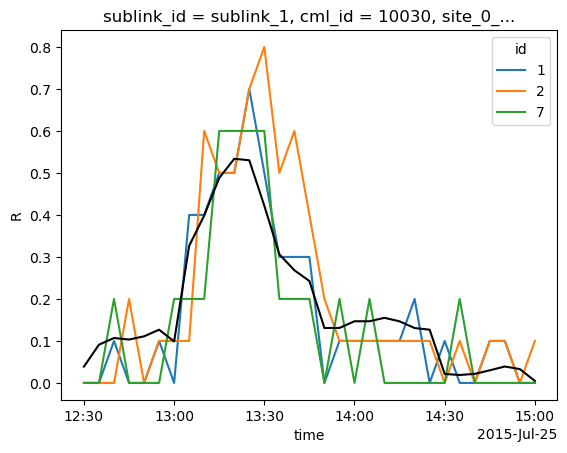

In [151]:
cml_id = 10030
ds_closests_gauges = (
    ds_gauges_municp.sel(id=closest_neigbors.sel(cml_id=cml_id).neighbor_id.values[:3])
)
ds_closests_gauges.rainfall_amount.plot.line(x='time')
ds_cmls.sel(cml_id=cml_id).R.plot(color='k')

## Extract radar along CML paths and compare data

In [155]:
get_grid_at_lines = plg.spatial.GridAtLines(
    da_gridded_data=ds_rad,
    ds_line_data=ds_cmls,
)

In [158]:
radar_along_cml = get_grid_at_lines(da_gridded_data=ds_rad.rainfall_amount)

In [159]:
radar_along_cml

<xarray.DataArray (time: 31, cml_id: 359)> Size: 89kB
array([[3.03861061e-02, 2.27863649e-02, 3.03861061e-02, ...,
        1.81577217e-02, 6.58473716e-02, 2.58898559e-02],
       [6.42207029e-02, 3.40937718e-02, 6.42207029e-02, ...,
        1.88542181e-02, 2.89130153e-02, 3.98361115e-02],
       [5.40349872e-02, 7.20568139e-02, 5.40349872e-02, ...,
        2.11878040e-02, 2.10021672e-02, 7.20687694e-02],
       ...,
       [4.05205197e-05, 4.05205197e-05, 4.05205197e-05, ...,
        4.05061157e-05, 4.05271024e-05, 4.05272427e-05],
       [4.05205197e-05, 4.05205197e-05, 4.05205197e-05, ...,
        4.05061157e-05, 4.05271024e-05, 4.05272427e-05],
       [4.05205197e-05, 4.05205197e-05, 4.05205197e-05, ...,
        4.05061157e-05, 4.05271024e-05, 4.05272427e-05]])
Coordinates: (12/15)
  * cml_id        (cml_id) int64 3kB 10001 10002 10003 ... 10362 10363 10364
  * time          (time) datetime64[ns] 248B 2015-07-25T12:30:00 ... 2015-07-...
    sublink_id    <U9 36B ...
    site_0_lat    (cml_id) float64 3kB 57.7 57.73 57.69 ... 57.65 57.66 57.71
    site_0_lon    (cml_id) float64 3kB 12.0 11.98 11.97 ... 12.12 12.03 12.01
    site_1_lat    (cml_id) float64 3kB 57.7 57.72 57.69 ... 57.66 57.63 57.71
    ...            ...
    length        (cml_id) float64 3kB 691.4 614.6 323.7 ... 4.806e+03 1.412e+03
    quantile      float64 8B ...
    site_0_x      (cml_id) float64 3kB 6.785e+05 6.776e+05 ... 6.792e+05
    site_0_y      (cml_id) float64 3kB 6.4e+06 6.402e+06 ... 6.394e+06 6.4e+06
    site_1_x      (cml_id) float64 3kB 6.783e+05 6.77e+05 ... 6.778e+05
    site_1_y      (cml_id) float64 3kB 6.399e+06 6.402e+06 ... 6.401e+06

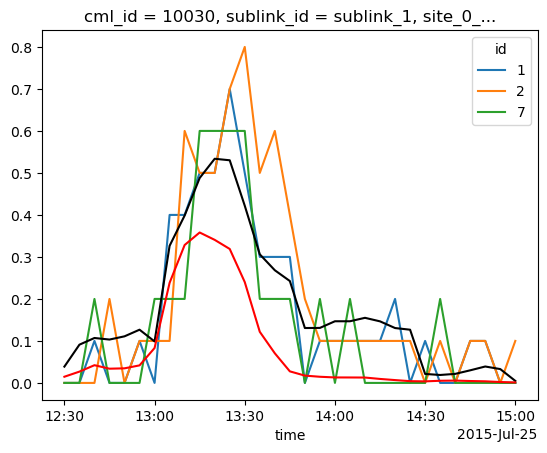

In [162]:
cml_id = 10030
ds_closests_gauges = (
    ds_gauges_municp.sel(id=closest_neigbors.sel(cml_id=cml_id).neighbor_id.values[:3])
)
ds_closests_gauges.rainfall_amount.plot.line(x='time')
ds_cmls.sel(cml_id=cml_id).R.plot(color='k')
radar_along_cml.sel(cml_id=cml_id).plot(color='r')

<Axes: >

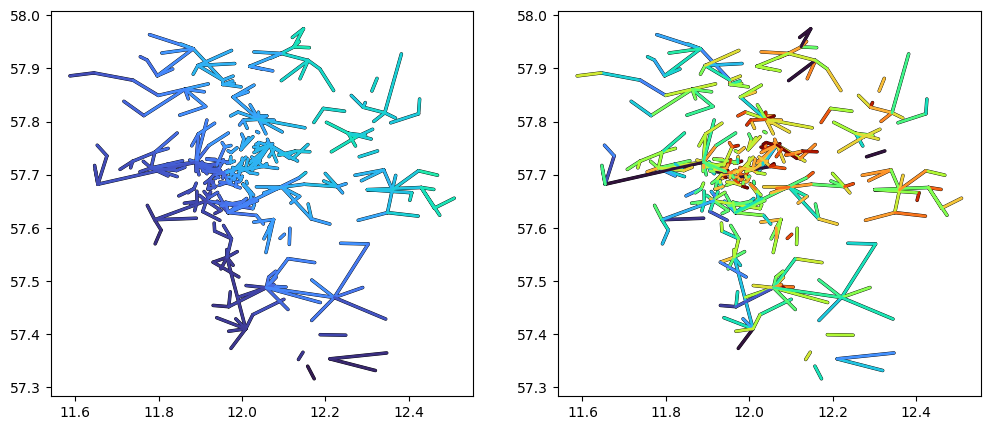

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plg.plot_map.plot_plg(da_cmls=radar_along_cml.sum(dim='time'), ax=axs[0], vmin=0, vmax=10)
plg.plot_map.plot_plg(da_cmls=ds_cmls.R.sum(dim='time'), ax=axs[1], vmin=0, vmax=10)

## Excercise: Analyse difference between radar and CML

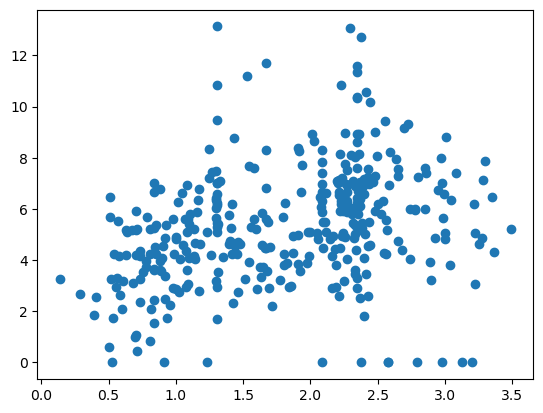

In [184]:
plt.scatter(
    radar_along_cml.sum(dim='time'),
    ds_cmls.R.sum(dim='time'),
)

<Axes: >

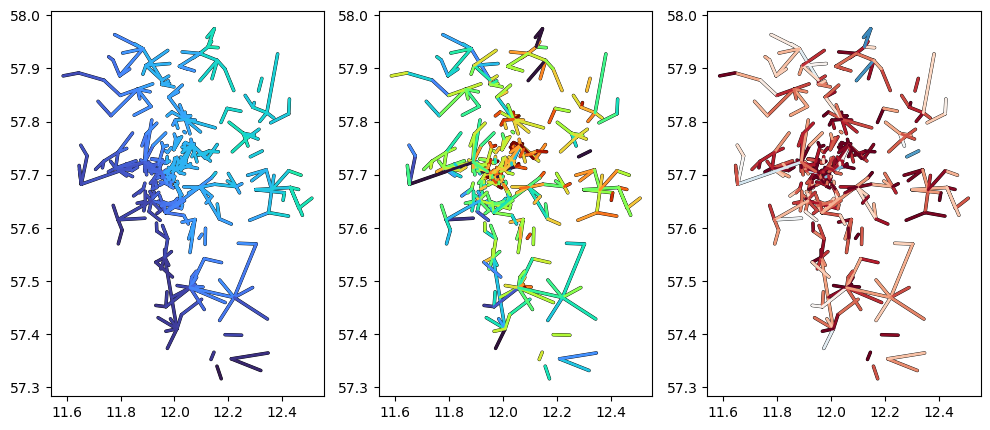

In [183]:
da_diff = radar_along_cml.sum(dim='time') - ds_cmls.R.sum(dim='time')

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plg.plot_map.plot_plg(da_cmls=radar_along_cml.sum(dim='time'), ax=axs[0], vmin=0, vmax=10)
plg.plot_map.plot_plg(da_cmls=ds_cmls.R.sum(dim='time'), ax=axs[1], vmin=0, vmax=10)
plg.plot_map.plot_plg(da_cmls=da_diff, ax=axs[2], vmin=-5, vmax=5, cmap='RdBu')

## Excercise: Compare CML to gauges within 2 km

In [196]:
gauge_id_closest = closest_neigbors.neighbor_id.where(closest_neigbors.distance < 2000, drop=True).isel(n_closest=0)
gauge_id_closest

<xarray.DataArray 'neighbor_id' (cml_id: 148)> Size: 1kB
array([7, 8, 4, 8, 6, 6, 8, 4, 7, 6, 8, 7, 8, 8, 7, 6, 6, 6, 6, 6, 6, 4,
       4, 4, 4, 7, 7, 7, 7, 1, 7, 1, 2, 7, 4, 7, 6, 6, 6, 1, 1, 1, 2, 7,
       2, 2, 5, 5, 5, 8, 5, 3, 3, 5, 5, 5, 0, 0, 0, 0, 0, 0, 4, 6, 5, 6,
       8, 0, 0, 2, 5, 8, 0, 5, 5, 2, 5, 8, 6, 7, 6, 4, 5, 8, 8, 6, 1, 1,
       4, 8, 5, 1, 2, 6, 7, 6, 7, 4, 8, 8, 4, 1, 1, 2, 2, 2, 4, 9, 9, 0,
       0, 0, 9, 4, 4, 9, 0, 2, 2, 2, 4, 3, 3, 3, 5, 5, 3, 3, 3, 5, 3, 9,
       9, 0, 9, 0, 6, 6, 7, 7, 7, 7, 5, 7, 6, 4, 9, 7], dtype=object)
Coordinates:
  * cml_id   (cml_id) int64 1kB 10001 10002 10003 10004 ... 10361 10363 10364

In [199]:
closest_gauge_rainfall_for_cml = ds_gauges_municp.rainfall_amount.sel(id=gauge_id_closest)

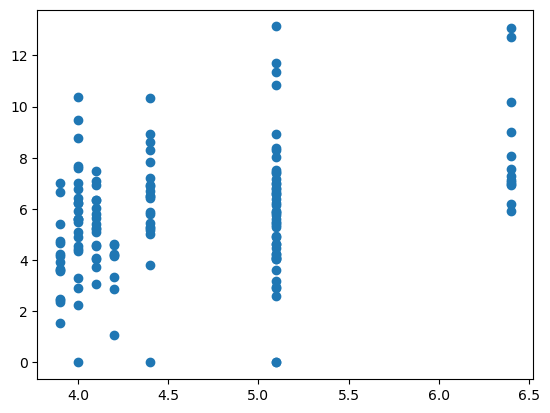

In [ ]:
plt.scatter(
    closest_gauge_rainfall_for_cml.sum(dim='time'),
    ds_cmls.sel(cml_id=closest_gauge_rainfall_for_cml.cml_id).R.sum(dim='time'),
)

## Validation

In [204]:
rainfall_metrics = plg.validation.calculate_rainfall_metrics(
    reference=radar_along_cml.data.flatten(),
    estimate=ds_cmls.R.data.flatten(),
    ref_thresh=0.1,
    est_thresh=0.1,
)
rainfall_metrics

{'ref_thresh': 0.1,
 'est_thresh': 0.1,
 'pearson_correlation_coefficient': np.float64(0.4564995869389117),
 'coefficient_of_variation': np.float64(2.5038546814625846),
 'root_mean_square_error': np.float64(0.24670102879732783),
 'mean_absolute_error': np.float64(0.20584382449909996),
 'percent_bias': np.float64(289.3545402594773),
 'reference_mean_rainfall': np.float64(0.06447217807458681),
 'estimate_mean_rainfall': np.float64(0.251025352537579),
 'false_positive_mean_rainfall': np.float64(0.20554734832084492),
 'false_negative_mean_rainfall': np.float64(0.18192121664723745),
 'N_all': 11129,
 'N_nan': np.int64(0),
 'N_nan_ref': np.int64(0),
 'N_nan_est': np.int64(0)}

(0.0, 5.0)

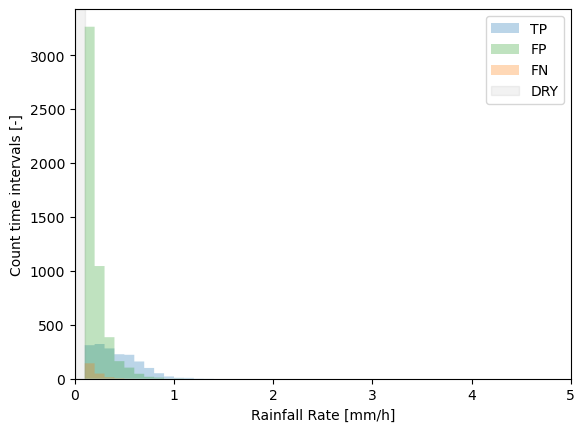

In [219]:
plg.validation.plot_confusion_matrix_count(
    reference=radar_along_cml.data.flatten(),
    estimate=ds_cmls.R.data.flatten(),
    ref_thresh=0.1,
    est_thresh=0.1,
    n_bins=1000,
    bin_type='linear',
);
plt.gca().set_xscale("linear")
#plt.gca().set_yscale("log")
plt.xlim([0, 5])